## Introduction to Python
This introduction is going to be from a perspective of how python fits into the data analysis eco-system. The emphasis will be on the conceptual building blocks.

<img src = workflow.png>

Skills needed for data science are quite different from other roles in this ecosystem. The crux of performing this job well depends on iterating through ideas to test different hypothesis or questions about the data. Once the hyptotheis or questions have been identified and ground truth insights that are useful to the business are encoded into an machine learning model. Operatinalizing this model is not typically the concern of data scientists. Of the programming languaze zoo, python fits this role well for many reasons and is used widely by data scientists. Some of the really attractive features are:

1. Interpretted Language with the REPL interface: Data scientists need a language to quickly iterate and test ideas. Very few of these ideas may get into a data product. Languages like Java or C++ may be good choices to implement a data product. These languages are however statically typed and iterating ideas using such languages would be much slower than doing so in python. Even in its most primitive form, python provides the Read, Evaluate, Program and Loop interface, which provides the user a quick interface to verify his or her intuitions.
2. Large Data Analysis Library Ecosystem: There are a large number of tools for almost every conceivable data science task in python.
3. Language features that promote productivity: Python has many attractive language features that boost productivity.
4. Low barrier to entry: Relatively easy to get to a productive state for a new user.

We will look at some of the important features and libraries today

## Typing
Python is dynamically but strongly typed. The type is inferred from context. Those used to programing in statically typed languages will be able to appreciate the boost in productivity from this feature. Examples

In [1]:
i = 1
j = "some string"
k = 3.1414

In [2]:
type(i)

int

In [3]:
type(k)

float

## Collections and Containers
Frequently for many programming tasks we have to deal with collections of objects over which we have to perform some computation or analysis. We also frequently deal with objects that contain other objects. Python provides many collections and in fact, a collections module for these tasks

In [4]:
# List Container
l = [1,3, 2]
# Not all objects have to be the same type
m = [1, "some string", 3.14]

In [6]:
# Dictionary - a name-value pair container
capital_cities = {"India": "New Delhi", "USA": "Washington DC", "Australia": "Canberra"}
capital_cities["India"]

'New Delhi'

In [8]:
from collections import Counter
l = ["socks", "socks", "shoes", "bat", "bat", "tent"]
c = Counter(l)
c.most_common()

[('bat', 2), ('socks', 2), ('shoes', 1), ('tent', 1)]

In [10]:
from collections import namedtuple
Chennai_Temp = ("Today", ["adayar", "saidapet"])

In [15]:
ct1 = ("Today", [27.5, 27.0])
ct2 = ("Yesterday", [26.6, 27])


## Functions
Functions are defined with the $\texttt{def}$ key word. A return from the function can be specified by the $\texttt{return}$ keyword. Functions support default arguments. Example

In [16]:
def my_nice_function(greeting = "say hello!"):
    print greeting
    return

In [17]:
my_nice_function("Hello, nice to meet you!")

Hello, nice to meet you!


In [18]:
my_nice_function()

say hello!


## Comprehensions
Comprehensions are very concise constructs to generate containers like lists and dictionaries. Comprehensions are created with the $\texttt{for}$ keyword. Examples 

In [21]:
## Lists
l = [1,2,3,4,5]
c = [2*val for val in l]

In [22]:
c 

[2, 4, 6, 8, 10]

In [23]:
cp = [3*val for val in l if val > 3]

In [24]:
cp

[12, 15]

In [25]:
## Dictionaries
names = ["ram", "shyam", "nitin", "ajit"]
ages = [12,12, 15, 16]
t = zip(names, ages)

In [26]:
t

[('ram', 12), ('shyam', 12), ('nitin', 15), ('ajit', 16)]

In [27]:
d = { n:a for n, a in t}

In [28]:
d

{'ajit': 16, 'nitin': 15, 'ram': 12, 'shyam': 12}

### Lambda Functions
Often we have to write very simple functions for tasks. The implementation maybe so simple that writing a conventional function for them seems unnecessary. Lambda functions are functions (can be unnamed too) that we can define on the fly for such tasks

In [35]:
fn = ["Ram", "Shyam", "Ajit"]
ln = ["Dixit", "Gopal", "Narayanan"]
uidgen = lambda f,l : f[:2].lower() + l[:2].lower()
uids = [ uidgen(f,l) for f, l in zip(fn, ln)]
uids

['radi', 'shgo', 'ajna']

## Pandas

Most data scientist spend considerable amount of time cleaning, shaping and transforming data. Pandas is a python library for these needs and has good api for these operations. We will explore Pandas with examples. We will use the iris dataset which contains information about three botanical species.

## The DataFrame

The dataframe is an important abstraction in Pandas. Datasets are modeled as rectangular arrays. 

In [1]:
import pandas as pd
fp = "iris.csv"
df = pd.read_csv(fp)

In [2]:
## Examine the contents of the data - take the first few rows as a sample
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Examine the data types of the attributes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Describe the characteristics of the data in the dataset - high level statistics
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
# For the categorical attribute, list the number of each species in the dataset
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
## querying
df.query('sepal_length < 5.84').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Another way to do the same thing - multiple ways to query data
df[df.sepal_length < 5.84].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Grouping and Aggregation
Grouping and aggregation are very common data analysis applications. Pandas offers SQL like semantics for these operations

In [14]:
dfsgb = df.groupby("species").agg({'sepal_length': 'mean', 'species': 'count'})

In [16]:
dfsgb

,species,sepal_length
species,,
Iris-setosa,50,5.006
Iris-versicolor,50,5.936
Iris-virginica,50,6.588


In [17]:
dfsgb.columns = ["species count", "mean sepal length"]

In [18]:
dfsgb

,species count,mean sepal length
species,,
Iris-setosa,50,5.006
Iris-versicolor,50,5.936
Iris-virginica,50,6.588


## Basic Plots
Pandas supports basic plotting to quickly visualize the range of values and summarize datasets. The plot functionality is *not* meant to be used to visualize modeling results, for which specialized tools are available.

## Series
Individual columns in a data frame are called series and pandas supports many basic plots for series

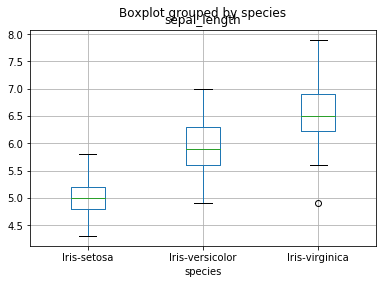

In [28]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# Box plots for range of an attribute
df.boxplot(column = "sepal_length", by = "species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783ef491d0>,
      dtype=object)

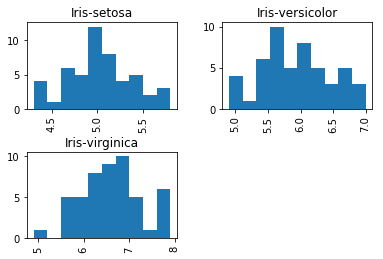

In [29]:
df.hist(column = "sepal_length", by = "species")

In [30]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Indexing and Selection

In [37]:
# Select a column
df_sp = df.loc[:, "species"]
df_sp.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [40]:
# select all columns and the first 5 rows (row numbers begin with 0 - make note)
df.loc[0:4, :]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Transformation of Attributes

In [41]:
## recode species as 0, 1,2 
sc = df.species.unique().tolist()

In [42]:
sc

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [43]:
nv = [0, 1,2]
s2n = {s:n for s, n in zip(sc, nv)}

In [48]:
s2n

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

### Apply
Apply can be used to apply a function along a column. This is very fast compared to iterating the dataframe in a forloop. Note the use of anonymous lambda function

In [46]:
df["recoded_species"] = df.species.apply(lambda x: s2n[x])

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,recoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
